# Midterm Project
###### By Ian Pascoe

This project will combine all of the methods of data analysis that we have done in class thus far. This will include numerical analysis of the data, which is finding the mode, mean, minimum and maximum values. There will also be a section for visualizeing the data, using histograms for numerical columns and bar plots for categorical columns. These plots will be done in both seaborn and matplotlib to see the difference between them. Lastly, machine learning of the data set will be practiced by creating a decision tree that will produce predicted outcomes. These predicted outcomes will be compared to the actual result found in the original data frame. From there, I will restrict the accuracy of the model to find underlying trends in the data that have a heavier impact on the results.

In [2]:
# Import all the necessary modules for the project

import pandas
import numpy as np
import matplotlib.pyplot as plot
import collections as col
%matplotlib inline
import pandas as pd
from sklearn import tree
from treeviz import tree_print
from sklearn.metrics import accuracy_score
import seaborn as sns

## Displaying the Dataframe

In [3]:
# Read from the csv file and display a sample
caesar = pandas.read_csv('caesarian.csv')
caesar.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,False
1,26,2,0,1,0,True
2,26,2,1,1,0,False
3,28,1,0,2,0,False
4,22,2,0,1,0,True


## Numerical Analysis of the Data
### Finding the Number of Rows and Columns

In [4]:
# Find the amount of rows and columns in the data set
rows, cols = caesar.shape
print("How many rows there are:", rows)
print("How many columns there are:", cols)

How many rows there are: 78
How many columns there are: 6


### Finding the Mode of Categorical Columns

In [5]:
# For the categorical columns, compute the mode

# delivery # column
dNumber_mode = caesar['Delivery number'].mode()
print("Mode for column 'Delivery number':\n", dNumber_mode, '\n')

# delivery time column
dTime_mode = caesar['Delivery time'].mode()
print("Mode for column 'Delivery time':\n", dTime_mode, '\n')

# Blood of Pressure column
BP_mode = caesar['Blood of Pressure'].mode()
print("Mode for column 'Blood of Pressure':\n", BP_mode, '\n')

# heart problem column
HP_mode = caesar['Heart Problem'].mode()
print("Mode for column 'Heart Problem':\n", HP_mode)

Mode for column 'Delivery number':
 0    1
dtype: int64 

Mode for column 'Delivery time':
 0    0
dtype: int64 

Mode for column 'Blood of Pressure':
 0    1
dtype: int64 

Mode for column 'Heart Problem':
 0    0
dtype: int64


### Finding the Mean, Max & Min of Numerical Columns

In [8]:
# For numerical columns find the max, min and mean

# age column
print("Values for the 'Age' column:")
age_mean = caesar['Age'].mean()
age_max = caesar['Age'].max()
age_min = caesar['Age'].min()
print("Mean age:", age_mean)
print("Max age:", age_max)
print("Min age:", age_min)

Values for the 'Age' column:
Mean age: 27.76923076923077
Max age: 40
Min age: 17


As seen above there is one numerical column and three categorical columns.

## Plotting the Data with Matplotlib
### Plotting Histograms of Some Numerical Columns

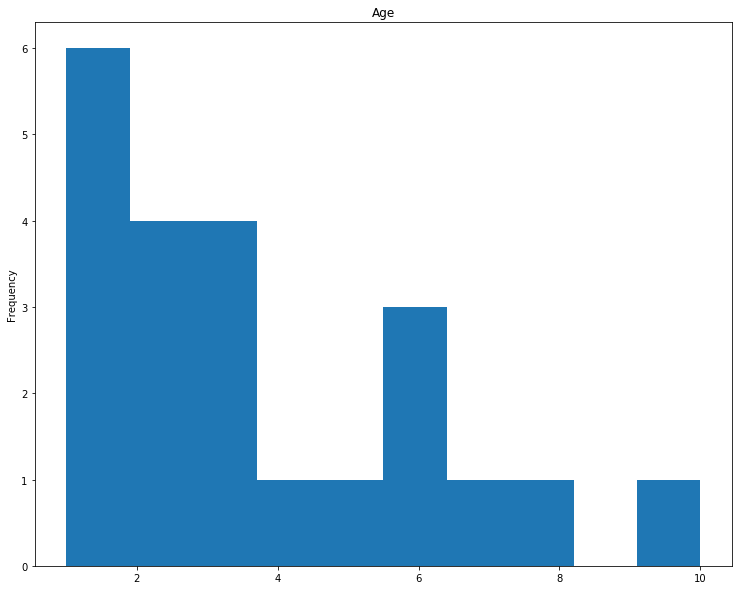

In [9]:
# Using notes from class, I plot all of the numerical plots on the same line using a for loop

for i in range(1,3):
    if (i == 1):
        plot.subplot(1,3,i)
        plot.title(caesar.columns[i-1])
        plot.subplots_adjust(wspace=0.5, hspace=0.5)
        caesar.iloc[:,i-1].value_counts().plot(kind='hist',figsize=(50,10))

Above the histogram shows the distribution of the different ages. Matplotlib has an error while displaying the ages, this error is fixed when using seaborn later on.
### Plotting Bar Graph for the Categorical Column

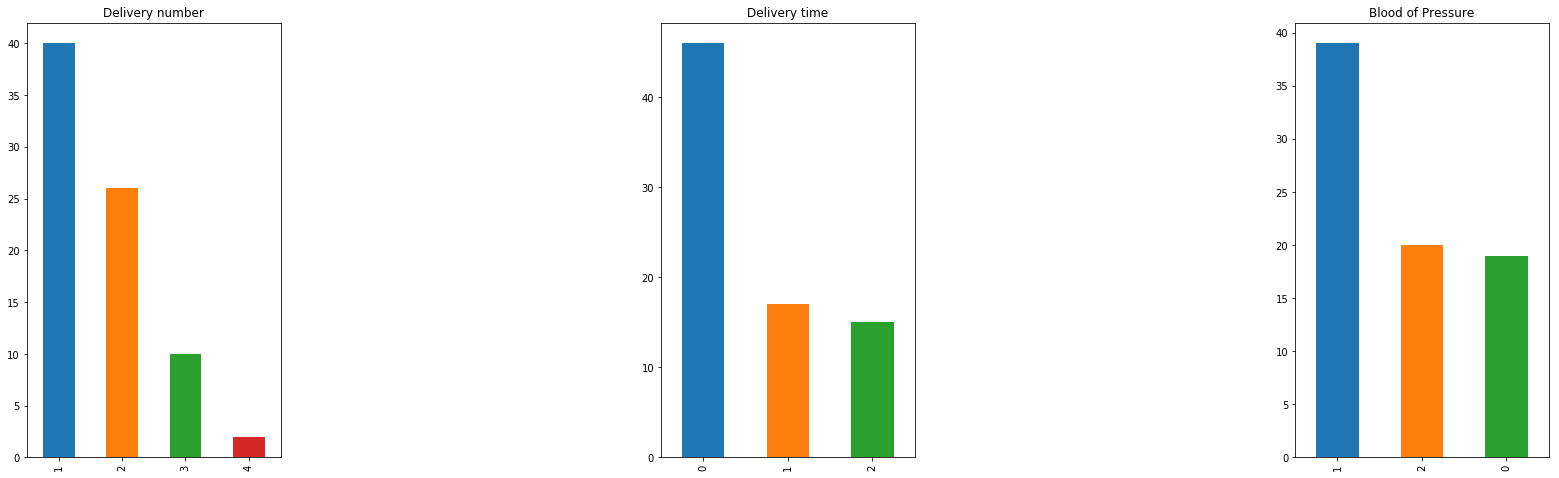

In [10]:
# Using same method as before I plot the bar plots for the categorical columns

for i in range(2,5):
    if (i == 2 or i == 3 or i == 4):
        plot.subplot(2,5,i)
        plot.title(caesar.columns[i-1])
        plot.subplots_adjust(wspace=1.5, hspace=0.5)
        caesar.iloc[:,i-1].value_counts().plot(kind='bar',figsize=(50,20))

Above we see the number of times each categorical data appears in the dataframe. Gives a good visual of the mode of each category.

## Machine Learning Example

In [11]:
# Extract the independent variables from the data set

features_df = caesar.drop(['Caesarian'],axis=1)
features_df.head()

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem
0,22,1,0,2,0
1,26,2,0,1,0
2,26,2,1,1,0
3,28,1,0,2,0
4,22,2,0,1,0


In [12]:
# Extract the dependent variable

target_df = pd.DataFrame(caesar['Caesarian'])
target_df.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [13]:
# Create the decision tree using sklearn

dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# Visualize the tree using treeviz.py

tree_print(dtree,features_df)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then if Age =< 27.5: 
  |  |  |  |  |  |  |then if Delivery time =< 0.5: 
  |  |  |  |  |  |  |  |then if Age =< 26.5: 
  |  |  |  |  |  |  |  |  |then if Delivery number =< 1.5: 
  |  |  |  |  |  |  |  |  |  |then if Blood of Pressure =< 0.5: 
  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  |else if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |  |  |  |  |  |  |then if Age =< 23.5: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then True
  |  |  |  |  |  |  |  |  |  |  |  |  |else False
  |  |  |  |  |  |  |  |  |  |  |  |else if Age =< 24.0: 
  |  |  |  |  |  |  |  |  |  |  |  |  |then False
  |  |  |  |  |  |  |  |  |  |  

In [15]:
# Produce the predicted outcome array and turn it into a dataframe
# View the head

predict_array = dtree.predict(features_df)
predicted_labels = pd.DataFrame(predict_array)
predicted_labels.columns = ['Caesarian']
predicted_labels.head()

,Caesarian
0,False
1,True
2,False
3,False
4,True


In [16]:
# See if outcome is exact

predicted_labels.equals(target_df)

False

In [17]:
# Since it is not exact, we test the accuracy score

print("Model accuracy is {}".format(accuracy_score(target_df, predicted_labels)))

Model accuracy is 0.9615384615384616


Using the best decision tree possible, the prediction is only ~96% accurate. This is very accurate but means that there will still be errors ~4% of the time. The highest branches of the tree are the key attributes that are more important to the outcomes. Here we see age is a key contributer to the predictions.

## Displaying Data Using Seaborn
### Distribution Plots

C:\Users\Ian Pascoe\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


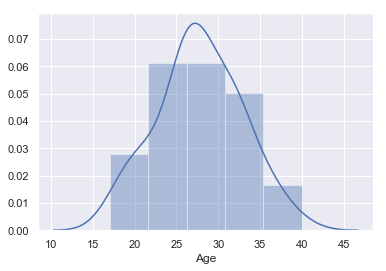

In [18]:
# Set seaborn and compute the distrubution plot
# since there is only one numerical column, there is one plot.

sns.set()
sns.distplot(caesar.loc[:,'Age'], hist=True, kde=True, bins= 5)

### Bar Plots

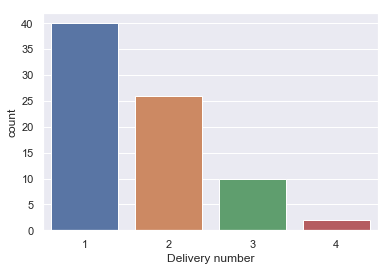

In [19]:
# Compute bar plots for all of the categorical columns

sns.countplot(caesar.loc[:,'Delivery number'])

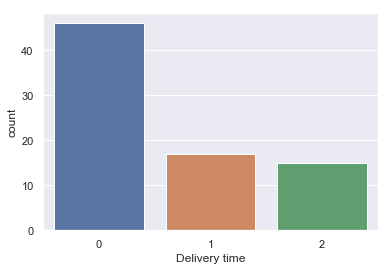

In [20]:
sns.countplot(caesar.loc[:,'Delivery time'])

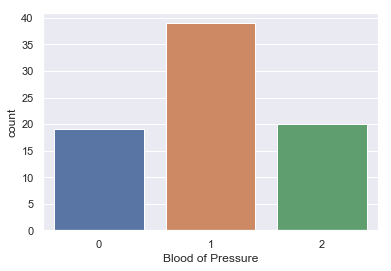

In [21]:
sns.countplot(caesar.loc[:,'Blood of Pressure'])

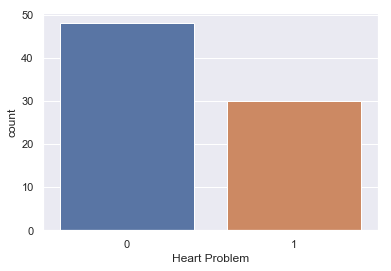

In [22]:
sns.countplot(caesar.loc[:,'Heart Problem'])

### Pair Plot

C:\Users\Ian Pascoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ian Pascoe\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Ian Pascoe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


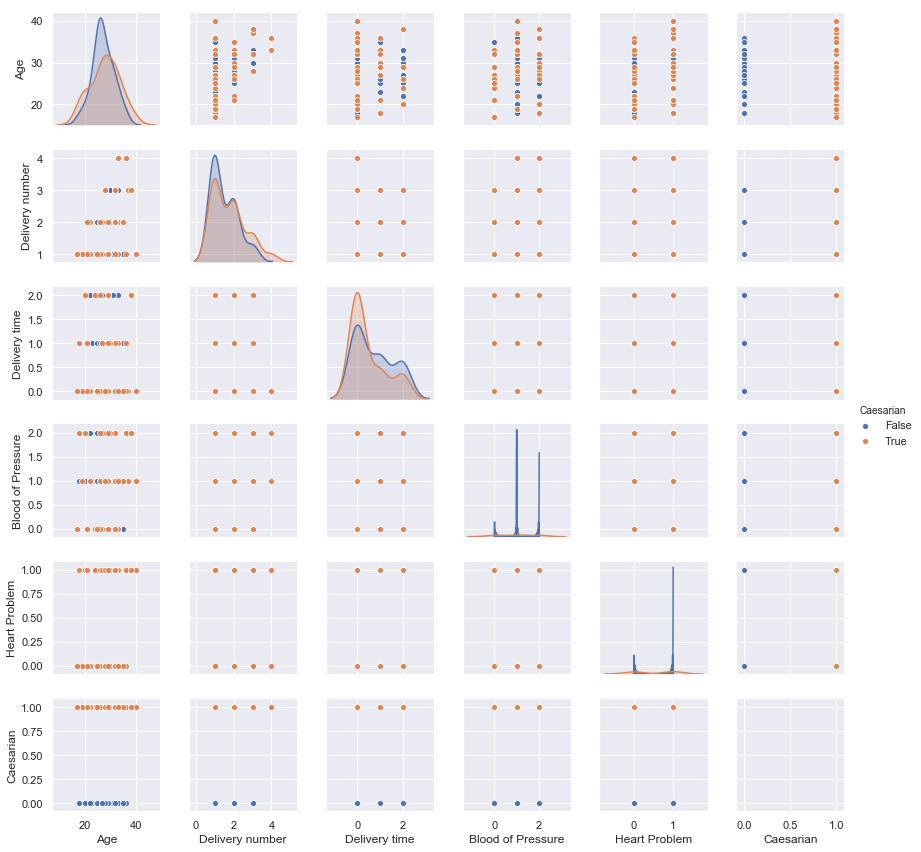

In [23]:
# Plot a pair plot to view the relationship between variables

sns.pairplot(caesar, hue='Caesarian', height=2)

## Restricting Tree Depth Effecting Model Accuracy

In [24]:
dtree2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
dtree2.fit(features_df,target_df)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
tree_print(dtree2,features_df)

if Heart Problem =< 0.5: 
  |then if Age =< 21.5: 
  |  |then if Age =< 18.5: 
  |  |  |then if Age =< 17.5: 
  |  |  |  |then True
  |  |  |  |else False
  |  |  |else True
  |  |else if Delivery number =< 2.5: 
  |  |  |then if Age =< 31.5: 
  |  |  |  |then if Age =< 29.5: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then False
  |  |  |  |  |  |else True
  |  |  |  |  |else False
  |  |  |  |else if Delivery number =< 1.5: 
  |  |  |  |  |then if Blood of Pressure =< 1.5: 
  |  |  |  |  |  |then False
  |  |  |  |  |  |else True
  |  |  |  |  |else True
  |  |  |else if Delivery time =< 1.0: 
  |  |  |  |then True
  |  |  |  |else False
  |else if Blood of Pressure =< 0.5: 
  |  |then True
  |  |else if Blood of Pressure =< 1.5: 
  |  |  |then if Age =< 26.5: 
  |  |  |  |then False
  |  |  |  |else if Delivery time =< 1.0: 
  |  |  |  |  |then if Age =< 28.5: 
  |  |  |  |  |  |then True
  |  |  |  |  |  |else True
  |  |  |  |  |else False
  |  |  |else if Delivery tim

In [26]:
predict_array2 = dtree2.predict(features_df)
predicted_labels2 = pd.DataFrame(predict_array2)
predicted_labels2.columns = ['Caesarian']
predicted_labels2.head()

,Caesarian
0,False
1,False
2,False
3,False
4,False


In [27]:
print("Model accuracy is {}".format(accuracy_score(target_df, predicted_labels2)))

Model accuracy is 0.8717948717948718


As we see, when restricting the decision tree to only a depth of 6, the model accuracy decreases by almost 10%. Yet, we see that the highest level branches stay the same. Here we see that Age, Blood of Pressure and Delivery time are the 3 key attributes that drive the predictions.